# Statistical Metrics

It maybe better to reduce the time-series data to a set of summary statistics. 

These might include the standard mean, and variance. It may also be useful to 

learn something about how the samples are distributed, skewness and kurtosis 

for instance. Skewness tells you if there are more large values on one side of 

the mean or the other. Kurtosis tells you about how "fat" the tails are. 

For a Gaussian distribution these values are 0 and 3 respectively. 

Because the generative process may not be stationary over time, look at a finite 

look-back and walk forward. 

The look-back is a parameter to tune.




In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
import matplotlib.pylab as plt

# assume its sorted
data = pd.read_csv("~/data/esp_data_one_month_10_minute_interval.csv")

# update index to minutes since epoch
index = np.array([(dt.datetime.strptime(i, "%m/%d/%y %H:%M") - 
                    dt.datetime(1970,1,1)).total_seconds()/60 for i in data['DateTime'] ], 
                       dtype=np.int64)
data.index = index
data.drop('DateTime', 1, inplace=True)
data.drop('CygNet_Connector_KRUNRSAC', 1, inplace=True)

A = data.rolling(100)

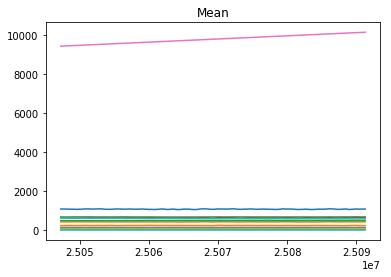

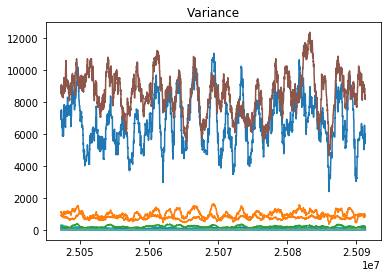

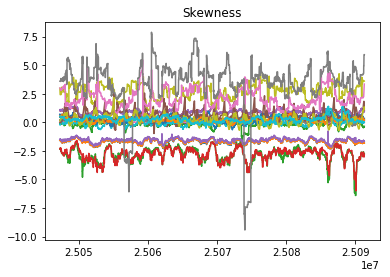

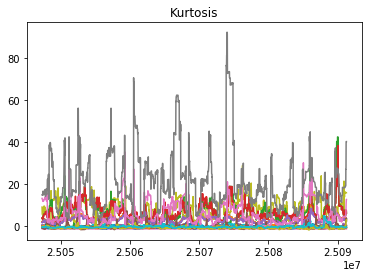

In [2]:
plt.figure()
plt.plot(A.mean())
plt.title('Mean')
plt.show()

plt.figure()
plt.plot(A.var())
plt.title('Variance')
plt.show()

plt.figure()
plt.plot(A.skew())
plt.title('Skewness')
plt.show()

plt.figure()
plt.plot(A.kurt())
plt.title('Kurtosis')
plt.show()

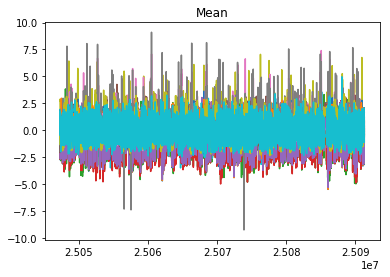

In [3]:
plt.figure()
plt.plot((data - A.mean())/A.std())
plt.title('Mean')
plt.show()
